In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
def process_gait_data(file_path):
    scaler = MinMaxScaler()
    df = pd.read_csv(file_path)    
    if 'Time (s)' in df.columns:
        df.drop(columns=['Time (s)'], inplace=True)        
    df = df.ffill().bfill()  
    df.replace([np.inf, -np.inf], np.nan, inplace=True) 
    df.dropna(inplace=True) 
    data_scaled = scaler.fit_transform(df)    
    min_val, max_val = np.min(data_scaled), np.max(data_scaled)
    print("Min value:", min_val, "Max value:", max_val)    
    df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
    return df_scaled, scaler

In [3]:
stance_RA = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-1/Right Stance/RA.csv'
stance_RH = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-1/Right Stance/RH.csv'
stance_RK = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-1/Right Stance/RK.csv'
swing_RA = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-1/Right Swing/RA.csv'
swing_RH = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-1/Right Swing/RH.csv'
swing_RK = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-1/Right Swing/RK.csv'

scaled_stance_RA, scaler_stance_RA = process_gait_data(stance_RA)
scaled_stance_RH, scaler_stance_RH = process_gait_data(stance_RH)
scaled_stance_RK, scaler_stance_RK = process_gait_data(stance_RK)
scaled_swing_RA, scaler_swing_RA = process_gait_data(swing_RA)
scaled_swing_RH, scaler_swing_RH = process_gait_data(swing_RH)
scaled_swing_RK, scaler_swing_RK = process_gait_data(swing_RK)

print(scaled_stance_RA.head())

Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0000000000000002
Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0000000000000002
Min value: 0.0 Max value: 1.0000000000000002
Min value: 0.0 Max value: 1.0
   X (m/s^2)  Y (m/s^2)  Z (m/s^2)     Theta
0   0.187628   1.000000   0.986371  0.021498
1   0.052125   0.998460   0.376775  0.467049
2   0.131178   0.465230   0.000000  0.861806
3   0.502109   0.150372   0.031800  1.000000
4   0.857684   0.080575   0.342419  0.688686


In [4]:
def create_sequences(data, seq_length):
    data = np.array(data)
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((seq, target))
    return sequences

seq_length = 10

sequences_ST_RA = create_sequences(scaled_stance_RA, seq_length)
sequences_ST_RH = create_sequences(scaled_stance_RH, seq_length)
sequences_ST_RK = create_sequences(scaled_stance_RK, seq_length)
sequences_SW_RA = create_sequences(scaled_swing_RA, seq_length)
sequences_SW_RH = create_sequences(scaled_swing_RH, seq_length)
sequences_SW_RK = create_sequences(scaled_swing_RK, seq_length)

In [5]:
def extract_X_y(sequences):
    X = np.array([seq[0] for seq in sequences])
    y = np.array([seq[1] for seq in sequences])
    return X, y

X_ST_RA, y_ST_RA = extract_X_y(sequences_ST_RA)
X_ST_RH, y_ST_RH = extract_X_y(sequences_ST_RH)
X_ST_RK, y_ST_RK = extract_X_y(sequences_ST_RK)
X_SW_RA, y_SW_RA = extract_X_y(sequences_SW_RA)
X_SW_RH, y_SW_RH = extract_X_y(sequences_SW_RH)
X_SW_RK, y_SW_RK = extract_X_y(sequences_SW_RK)

print(f"X_ST_RA shape: {X_ST_RA.shape}, y_ST_RA shape: {y_ST_RA.shape}")
print(np.isnan(X_ST_RA).sum(), np.isnan(y_ST_RA).sum())  
print(np.isinf(X_ST_RA).sum(), np.isinf(y_ST_RA).sum()) 

print(f"X_ST_RH shape: {X_ST_RH.shape}, y_ST_RH shape: {y_ST_RH.shape}")
print(np.isnan(X_ST_RH).sum(), np.isnan(y_ST_RH).sum()) 
print(np.isinf(X_ST_RH).sum(), np.isinf(y_ST_RH).sum()) 

print(f"X_ST_RK shape: {X_ST_RK.shape}, y_ST_RK shape: {y_ST_RK.shape}")
print(np.isnan(X_ST_RK).sum(), np.isnan(y_ST_RK).sum()) 
print(np.isinf(X_ST_RK).sum(), np.isinf(y_ST_RK).sum())  

print(f"X_SW_RA shape: {X_SW_RA.shape}, y_SW_RA shape: {y_SW_RA.shape}")
print(np.isnan(X_SW_RA).sum(), np.isnan(y_SW_RA).sum()) 
print(np.isinf(X_SW_RA).sum(), np.isinf(y_SW_RA).sum())  

print(f"X_SW_RH shape: {X_SW_RH.shape}, y_SW_RH shape: {y_SW_RH.shape}")
print(np.isnan(X_SW_RH).sum(), np.isnan(y_SW_RH).sum())  
print(np.isinf(X_SW_RH).sum(), np.isinf(y_SW_RH).sum()) 

print(f"X_SW_RK shape: {X_SW_RK.shape}, y_SW_RK shape: {y_SW_RK.shape}")
print(np.isnan(X_SW_RK).sum(), np.isnan(y_SW_RK).sum())  
print(np.isinf(X_SW_RK).sum(), np.isinf(y_SW_RK).sum()) 


X_ST_RA shape: (91, 10, 4), y_ST_RA shape: (91, 4)
0 0
0 0
X_ST_RH shape: (192, 10, 4), y_ST_RH shape: (192, 4)
0 0
0 0
X_ST_RK shape: (88, 10, 4), y_ST_RK shape: (88, 4)
0 0
0 0
X_SW_RA shape: (92, 10, 4), y_SW_RA shape: (92, 4)
0 0
0 0
X_SW_RH shape: (193, 10, 4), y_SW_RH shape: (193, 4)
0 0
0 0
X_SW_RK shape: (92, 10, 4), y_SW_RK shape: (92, 4)
0 0
0 0


In [6]:
def split_train_test(X, y, train_size=0.8):
    split_index = int(len(X) * train_size)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test

X_train_ST_RA, X_test_ST_RA, y_train_ST_RA, y_test_ST_RA = split_train_test(X_ST_RA, y_ST_RA)
X_train_ST_RH, X_test_ST_RH, y_train_ST_RH, y_test_ST_RH = split_train_test(X_ST_RH, y_ST_RH)
X_train_ST_RK, X_test_ST_RK, y_train_ST_RK, y_test_ST_RK = split_train_test(X_ST_RK, y_ST_RK)
X_train_SW_RA, X_test_SW_RA, y_train_SW_RA, y_test_SW_RA = split_train_test(X_SW_RA, y_SW_RA)
X_train_SW_RH, X_test_SW_RH, y_train_SW_RH, y_test_SW_RH = split_train_test(X_SW_RH, y_SW_RH)
X_train_SW_RK, X_test_SW_RK, y_train_SW_RK, y_test_SW_RK = split_train_test(X_SW_RK, y_SW_RK)


In [7]:

print(X_train_ST_RA.shape)
print(X_train_ST_RH.shape)
print(X_train_ST_RK.shape)
print(X_train_SW_RA.shape)
print(X_train_SW_RH.shape)
print(X_train_SW_RK.shape)

(72, 10, 4)
(153, 10, 4)
(70, 10, 4)
(73, 10, 4)
(154, 10, 4)
(73, 10, 4)


In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

In [9]:
# GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, activation='tanh', return_sequences=True, input_shape=input_shape))
    model.add(GRU(50, activation='tanh'))
    model.add(Dense(input_shape[-1]))
    model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0), loss='mse')
    return model

In [10]:
# # Prepare input shape
# input_shape = (X_train_LK.shape[1], X_train_LK.shape[2])

# gru_model = create_gru_model(input_shape)
# gru_model.summary()

In [11]:
def train_gru_for_joint(X_train, y_train, joint_name):
    input_shape = (X_train.shape[1], X_train.shape[2])
    gru_model = create_gru_model(input_shape)
    print(f"Training GRU model for {joint_name}...")
    gru_model.summary()
    history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
    return history, gru_model

In [12]:
histories = {}
models = {}

joint_data = {
    'ST_RA': (X_train_ST_RA, y_train_ST_RA),
    'ST_RH': (X_train_ST_RH, y_train_ST_RH),
    'ST_RK': (X_train_ST_RK, y_train_ST_RK),
    'SW_RA': (X_train_SW_RA, y_train_SW_RA),
    'SW_RH': (X_train_SW_RH, y_train_SW_RH),
    'SW_RK': (X_train_SW_RK, y_train_SW_RK)
}

In [13]:
for joint, (X_train, y_train) in joint_data.items():
    history, model = train_gru_for_joint(X_train, y_train, joint)
    histories[joint] = history
    models[joint] = model

print(histories)
print(models)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training GRU model for ST_RA...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 627ms/step - loss: 0.1564 - val_loss: 0.0733
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0992 - val_loss: 0.0420
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0597 - val_loss: 0.0227
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0311 - val_loss: 0.0161
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0177 - val_loss: 0.0222
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0150 - val_loss: 0.0358
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0185 - val_loss: 0.0468
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0238 - val_loss: 0.0486
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0211 - val_loss: 0.0431
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0176 - val_loss: 0.0350
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0140 - val_loss: 0.0272
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0132 - val_loss: 0.0211


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.2292 - val_loss: 0.2678
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0988 - val_loss: 0.1421
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0379 - val_loss: 0.1102
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0356 - val_loss: 0.0888
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0331 - val_loss: 0.0579
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0216 - val_loss: 0.0432
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0157 - val_loss: 0.0397
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0158 - val_loss: 0.0329
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0136 - val_loss: 0.0246
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0118 - val_loss: 0.0174
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0088 - val_loss: 0.0134
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0080 - val_loss: 0.0103
E

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - loss: 0.2497 - val_loss: 0.1191
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1799 - val_loss: 0.0635
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1224 - val_loss: 0.0257
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0780 - val_loss: 0.0101
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0560 - val_loss: 0.0169
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0487 - val_loss: 0.0312
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0550 - val_loss: 0.0339
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0506 - val_loss: 0.0252
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0409 - val_loss: 0.0144
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0322 - val_loss: 0.0073
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0307 - val_loss: 0.0063
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0307 - val_loss: 0.0092


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 0.1854 - val_loss: 0.1033
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1189 - val_loss: 0.0524
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0697 - val_loss: 0.0203
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0408 - val_loss: 0.0058
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0251 - val_loss: 0.0071
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0246 - val_loss: 0.0168
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0291 - val_loss: 0.0246
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0307 - val_loss: 0.0245
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0279 - val_loss: 0.0189
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0221 - val_loss: 0.0122
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0183 - val_loss: 0.0074
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0138 - val_loss: 0.0043


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.2119 - val_loss: 0.1983
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0931 - val_loss: 0.1075
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0367 - val_loss: 0.0627
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0371 - val_loss: 0.0333
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0302 - val_loss: 0.0198
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0179 - val_loss: 0.0230
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0159 - val_loss: 0.0238
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0141 - val_loss: 0.0182
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0127 - val_loss: 0.0103
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0075 - val_loss: 0.0066
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0071 - val_loss: 0.0056
E

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                    │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - loss: 0.2203 - val_loss: 0.1420
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1423 - val_loss: 0.1082
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0765 - val_loss: 0.0882
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0369 - val_loss: 0.0876
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0245 - val_loss: 0.1038
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0292 - val_loss: 0.1164
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0331 - val_loss: 0.1136
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0298 - val_loss: 0.1008
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0217 - val_loss: 0.0852
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0172 - val_loss: 0.0705
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0155 - val_loss: 0.0582
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0143 - val_loss: 0.0485


In [14]:
print(histories)
print(models)

{'ST_RA': <keras.src.callbacks.history.History object at 0x78c0680d5ed0>, 'ST_RH': <keras.src.callbacks.history.History object at 0x78c05036de70>, 'ST_RK': <keras.src.callbacks.history.History object at 0x78c02df8f970>, 'SW_RA': <keras.src.callbacks.history.History object at 0x78c000471840>, 'SW_RH': <keras.src.callbacks.history.History object at 0x78c001446440>, 'SW_RK': <keras.src.callbacks.history.History object at 0x78c00103b580>}
{'ST_RA': <Sequential name=sequential, built=True>, 'ST_RH': <Sequential name=sequential_1, built=True>, 'ST_RK': <Sequential name=sequential_2, built=True>, 'SW_RA': <Sequential name=sequential_3, built=True>, 'SW_RH': <Sequential name=sequential_4, built=True>, 'SW_RK': <Sequential name=sequential_5, built=True>}


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Evaluate models
def evaluate_model(model, X_test, y_test,scaler ,model_name):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - Mean Absolute Error: {mae}')
    predictions_inverse = scaler.inverse_transform(predictions)
    print(X_test.shape)
    print(predictions.shape)
    print(predictions_inverse.shape)
    return predictions_inverse

In [16]:
# Plot results
def plot_predictions(y_test_inverse, predictions_inverse, feature_index, model_name, joint_name):
    plt.figure(figsize=(14, 7))
    
    # Plot true values vs predictions
    plt.plot(y_test_inverse[:, feature_index], label='True Values')
    plt.plot(predictions_inverse[:, feature_index], label=f'{model_name} Predictions')
    
    plt.xlabel('Time')
    plt.ylabel('X (m/s2)')
    plt.title(f'True Values vs {model_name} Predictions for X (m/s2) - {joint_name}')
    plt.legend()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
GRU for ST_RA - Mean Squared Error: 0.018502277900937402
GRU for ST_RA - Mean Absolute Error: 0.1173631987114686
(19, 10, 4)
(19, 4)
(19, 4)


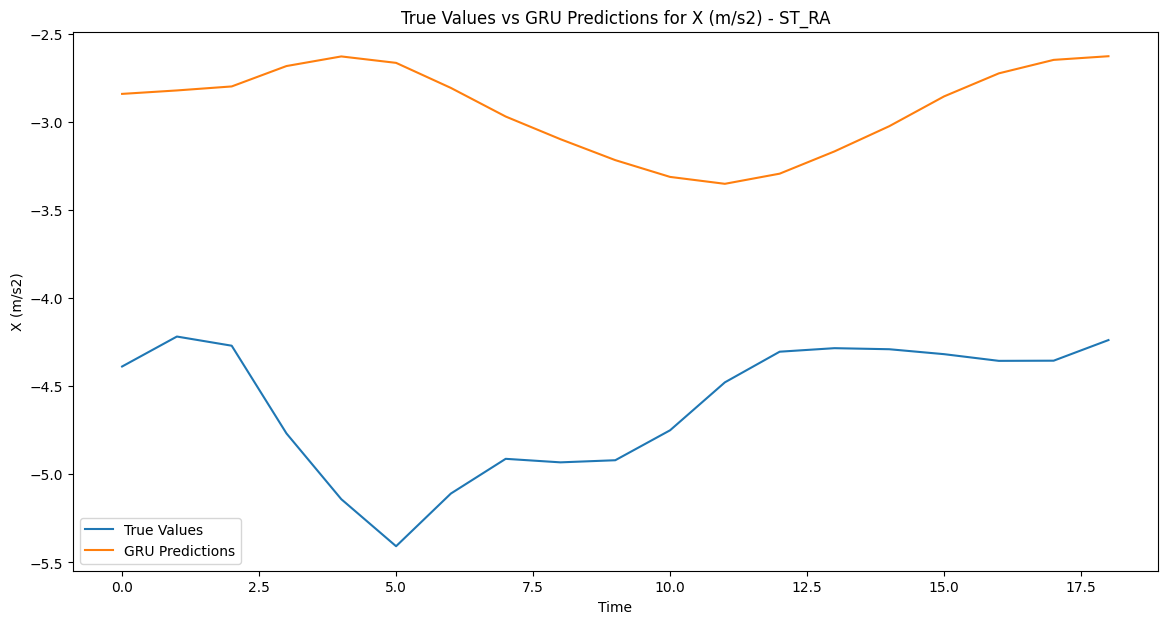

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
GRU for ST_RH - Mean Squared Error: 0.007921892131486878
GRU for ST_RH - Mean Absolute Error: 0.07534241595926779
(39, 10, 4)
(39, 4)
(39, 4)


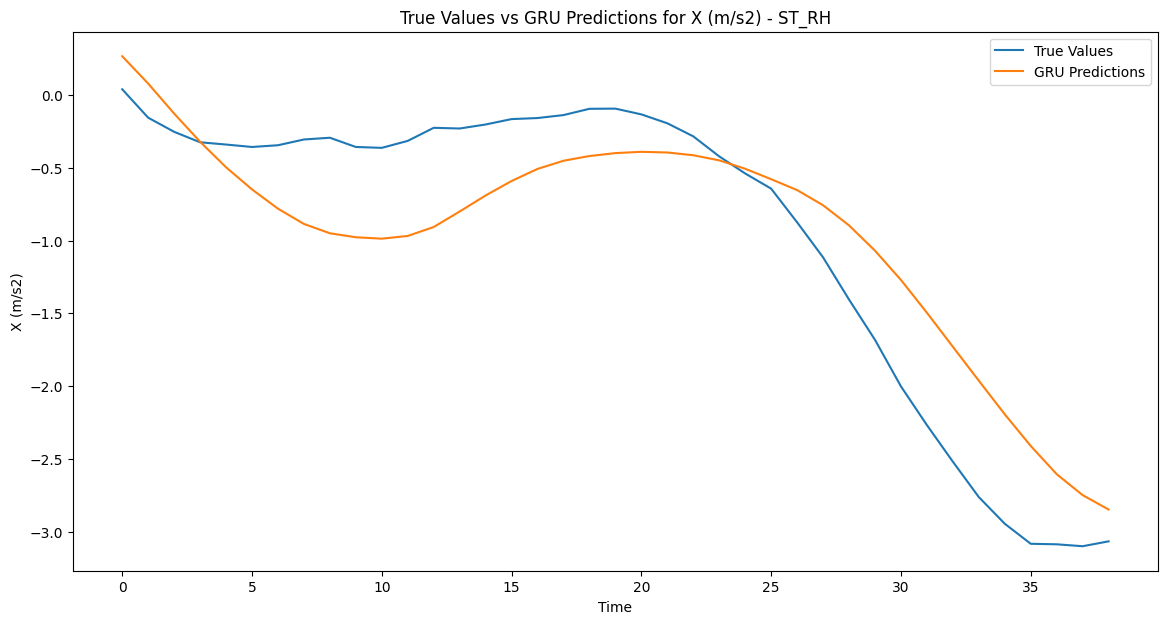

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
GRU for ST_RK - Mean Squared Error: 0.0059646597641209945
GRU for ST_RK - Mean Absolute Error: 0.05946671757152384
(18, 10, 4)
(18, 4)
(18, 4)


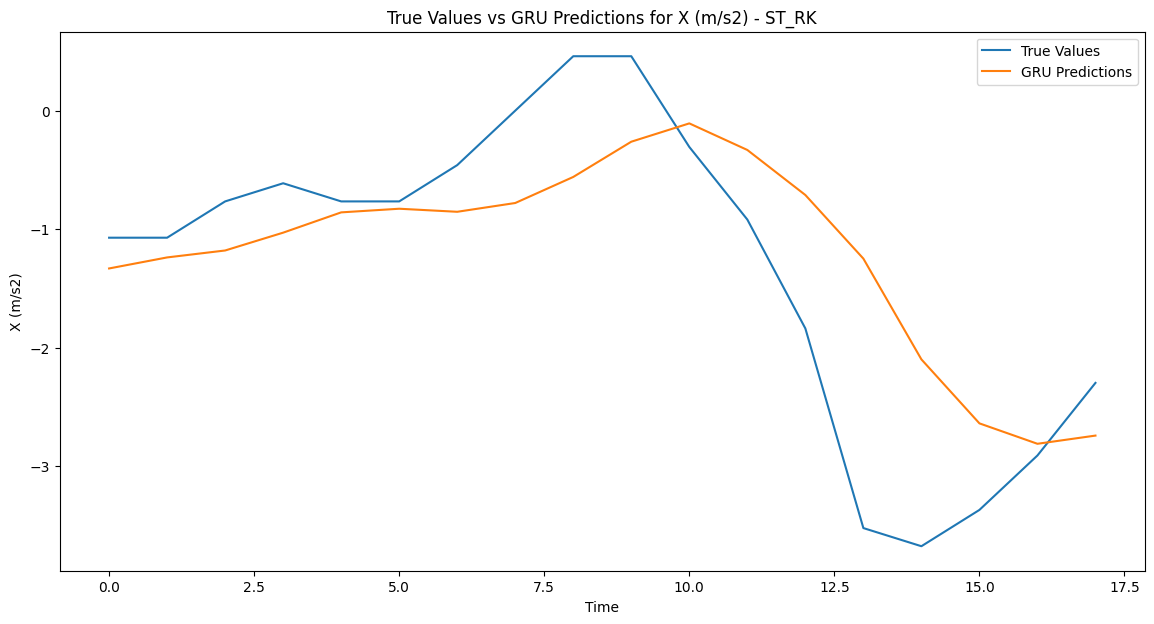

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
GRU for SW_RA - Mean Squared Error: 0.041986116494246016
GRU for SW_RA - Mean Absolute Error: 0.1269051860636226
(19, 10, 4)
(19, 4)
(19, 4)


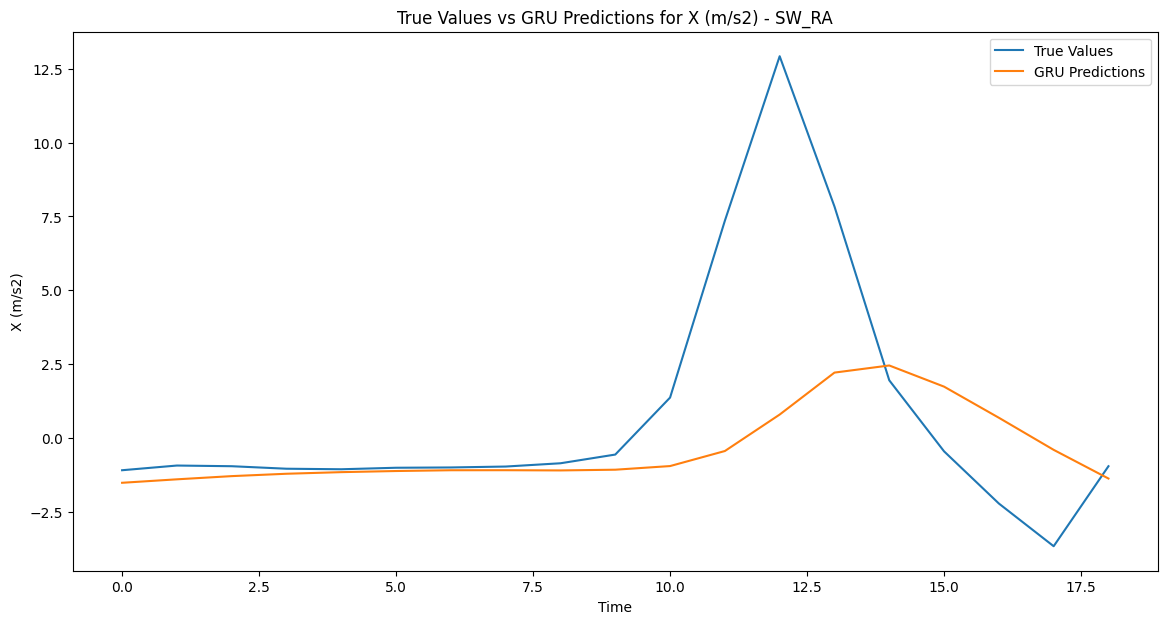

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
GRU for SW_RH - Mean Squared Error: 0.01950090168225388
GRU for SW_RH - Mean Absolute Error: 0.11655899036126754
(39, 10, 4)
(39, 4)
(39, 4)


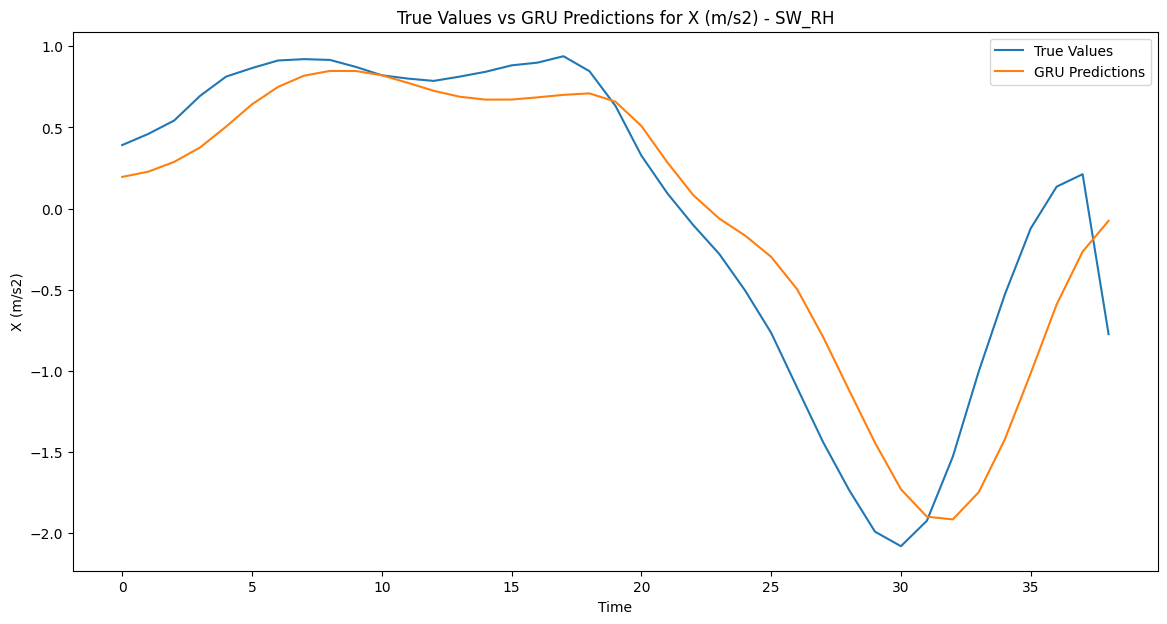

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
GRU for SW_RK - Mean Squared Error: 0.010262016523547366
GRU for SW_RK - Mean Absolute Error: 0.08533591135703256
(19, 10, 4)
(19, 4)
(19, 4)


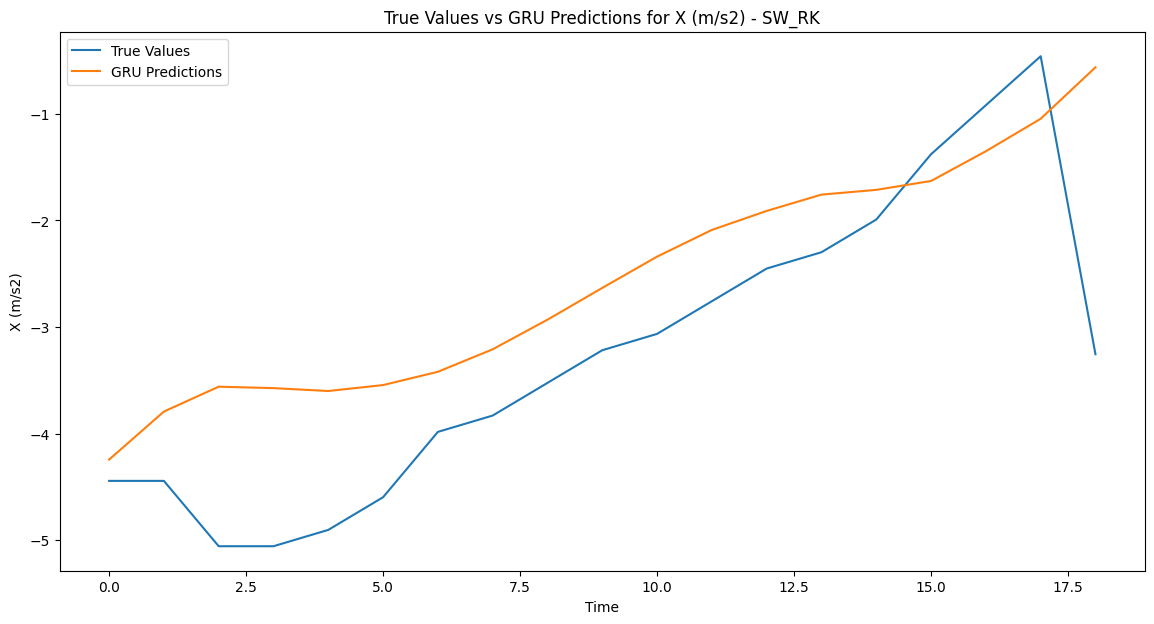

In [17]:
joint_data = {
    'ST_RA': (X_test_ST_RA, y_test_ST_RA, scaler_stance_RA),
    'ST_RH': (X_test_ST_RH, y_test_ST_RH, scaler_stance_RH),
    'ST_RK': (X_test_ST_RK, y_test_ST_RK, scaler_stance_RK),
    'SW_RA': (X_test_SW_RA, y_test_SW_RA, scaler_swing_RA),
    'SW_RH': (X_test_SW_RH, y_test_SW_RH, scaler_swing_RH),
    'SW_RK': (X_test_SW_RK, y_test_SW_RK, scaler_swing_RK)
}

for joint, (X_test, y_test, scaler) in joint_data.items():
    model = models[joint]
    
    if hasattr(scaler, 'min_'):
        predictions_inverse = evaluate_model(model, X_test, y_test, scaler, f'GRU for {joint}')
        
        y_test_inverse = scaler.inverse_transform(y_test)
        
        feature_index = 0
        
        plot_predictions(y_test_inverse, predictions_inverse, feature_index, 'GRU', joint)
    else:
        print(f"Scaler for {joint} has not been fitted.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU for ST_RK - Mean Squared Error: 0.0059646597641209945
GRU for ST_RK - Mean Absolute Error: 0.05946671757152384
(18, 10, 4)
(18, 4)
(18, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU for SW_RK - Mean Squared Error: 0.010262016523547366
GRU for SW_RK - Mean Absolute Error: 0.08533591135703256
(19, 10, 4)
(19, 4)
(19, 4)


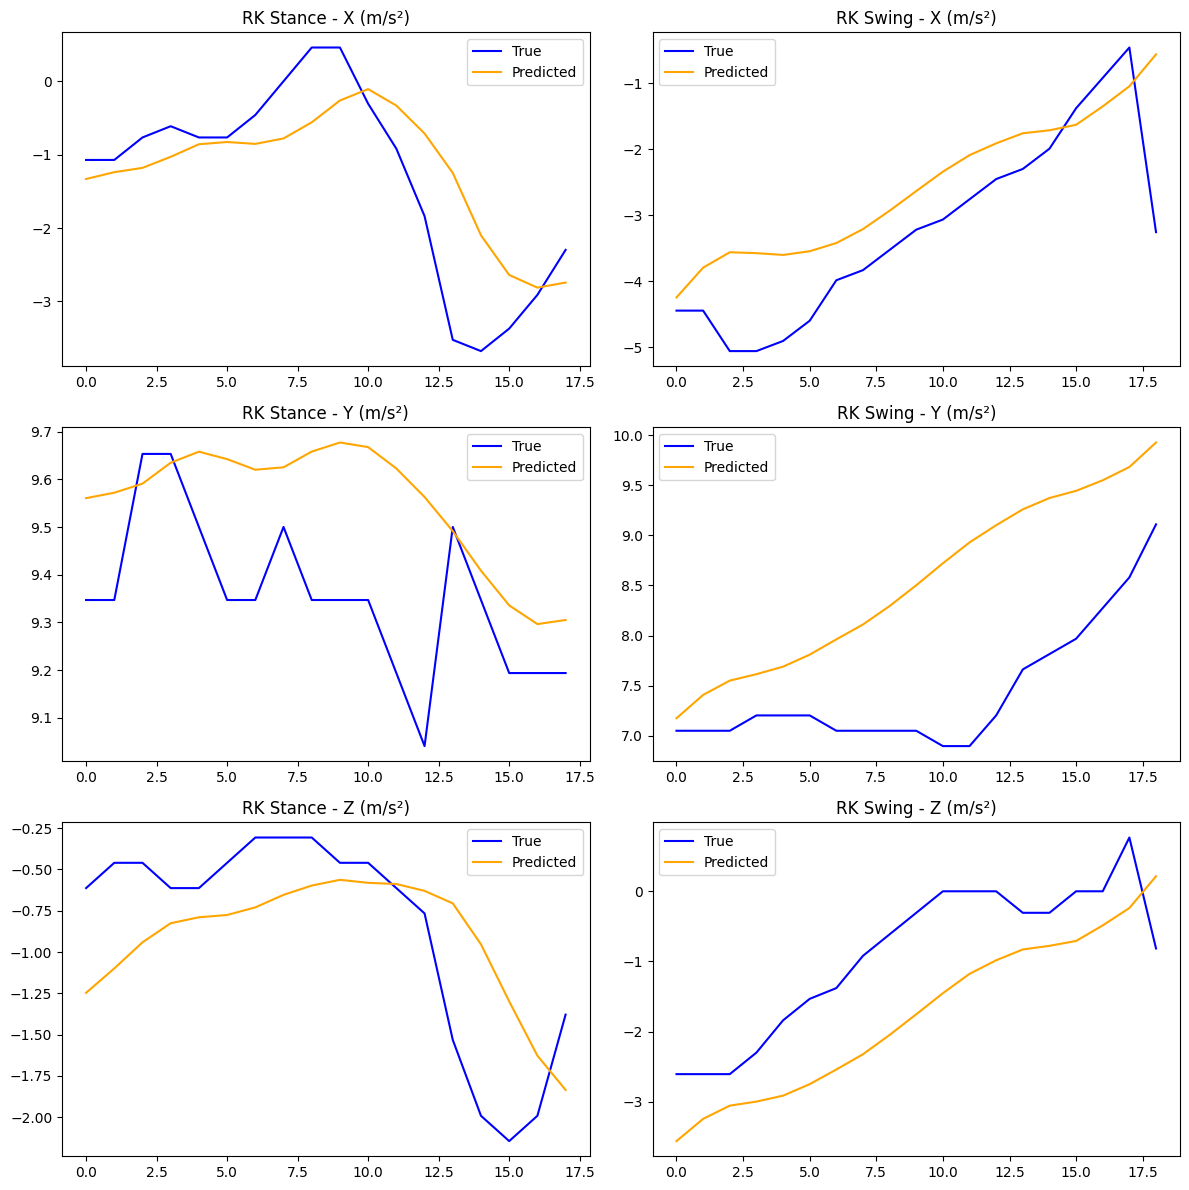

In [18]:
import matplotlib.pyplot as plt

def plot_joint_predictions(joint, y_test_inverse_stance, predictions_inverse_stance, y_test_inverse_swing, predictions_inverse_swing):
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))

    axes_labels = ['X (m/s²)', 'Y (m/s²)', 'Z (m/s²)']
    
    for i in range(3):  # For X, Y, and Z axis
        axes[i, 0].plot(y_test_inverse_stance[:, i], label='True', color='blue')
        axes[i, 0].plot(predictions_inverse_stance[:, i], label='Predicted', color='orange')
        axes[i, 0].set_title(f'{joint} Stance - {axes_labels[i]}')
        axes[i, 0].legend()
        
        axes[i, 1].plot(y_test_inverse_swing[:, i], label='True', color='blue')
        axes[i, 1].plot(predictions_inverse_swing[:, i], label='Predicted', color='orange')
        axes[i, 1].set_title(f'{joint} Swing - {axes_labels[i]}')
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()

y_test_inverse_stance_RK = scaler_stance_RK.inverse_transform(y_test_ST_RK)
y_test_inverse_swing_RK = scaler_swing_RK.inverse_transform(y_test_SW_RK)

predictions_inverse_stance_RK = evaluate_model(models['ST_RK'], X_test_ST_RK, y_test_ST_RK, scaler_stance_RK, 'GRU for ST_RK')
predictions_inverse_swing_RK = evaluate_model(models['SW_RK'], X_test_SW_RK, y_test_SW_RK, scaler_swing_RK, 'GRU for SW_RK')
plot_joint_predictions('RK', y_test_inverse_stance_RK, predictions_inverse_stance_RK, y_test_inverse_swing_RK, predictions_inverse_swing_RK)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU for ST_RA - Mean Squared Error: 0.018502277900937402
GRU for ST_RA - Mean Absolute Error: 0.1173631987114686
(19, 10, 4)
(19, 4)
(19, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU for SW_RA - Mean Squared Error: 0.041986116494246016
GRU for SW_RA - Mean Absolute Error: 0.1269051860636226
(19, 10, 4)
(19, 4)
(19, 4)


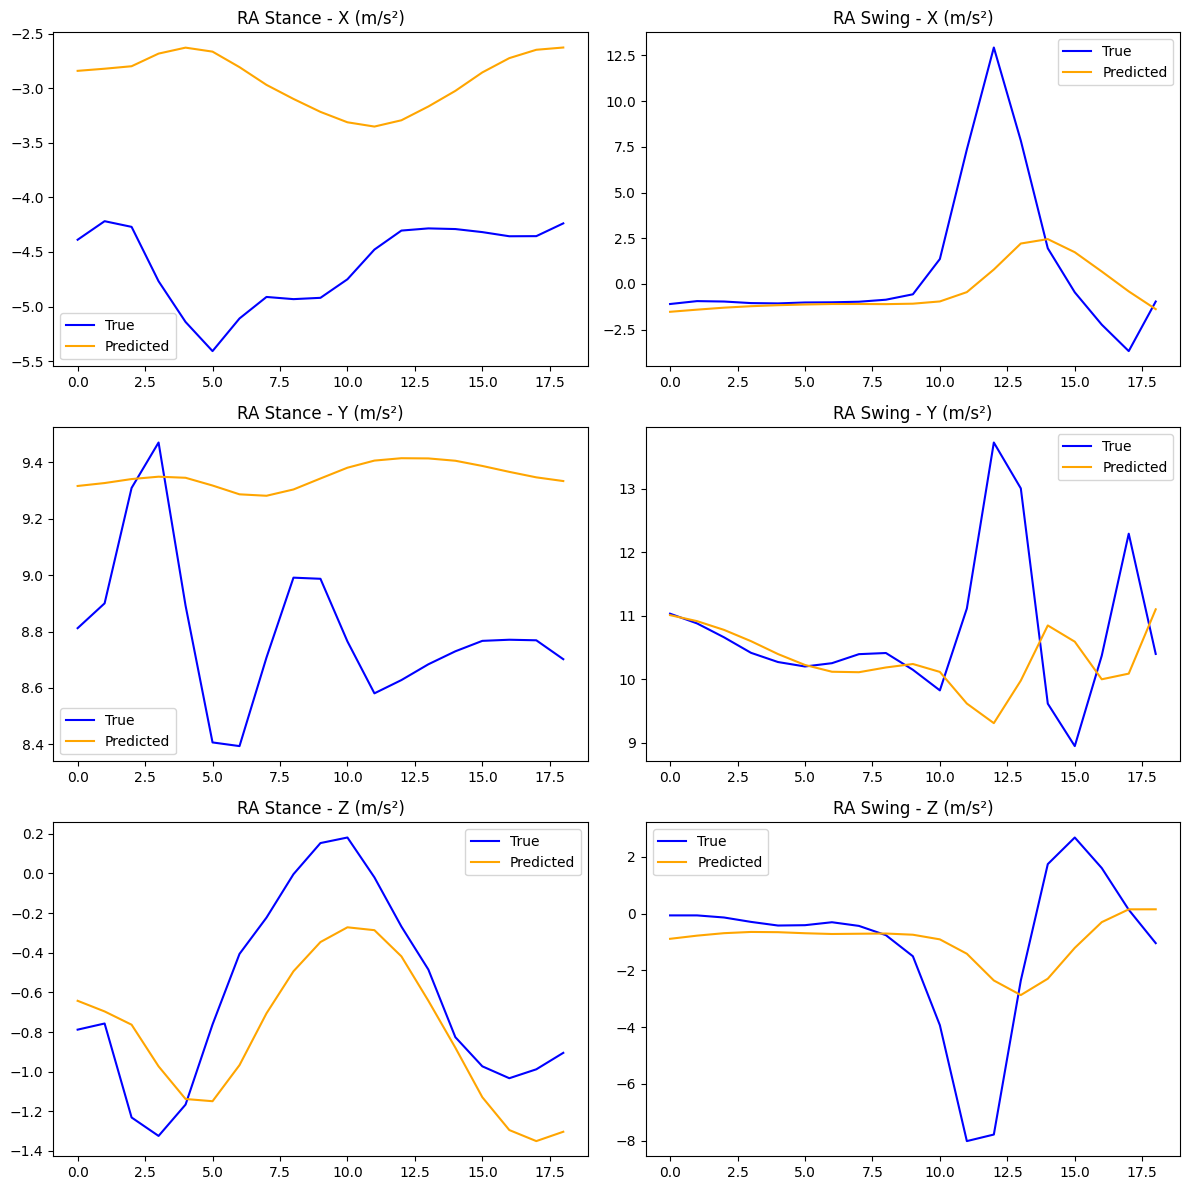

In [19]:
y_test_inverse_stance_RA = scaler_stance_RA.inverse_transform(y_test_ST_RA)
y_test_inverse_swing_RA = scaler_swing_RA.inverse_transform(y_test_SW_RA)

predictions_inverse_stance_RA = evaluate_model(models['ST_RA'], X_test_ST_RA, y_test_ST_RA, scaler_stance_RA, 'GRU for ST_RA')
predictions_inverse_swing_RA = evaluate_model(models['SW_RA'], X_test_SW_RA, y_test_SW_RA, scaler_swing_RA, 'GRU for SW_RA')

plot_joint_predictions('RA', y_test_inverse_stance_RA, predictions_inverse_stance_RA, y_test_inverse_swing_RA, predictions_inverse_swing_RA)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
GRU for ST_RH - Mean Squared Error: 0.007921892131486878
GRU for ST_RH - Mean Absolute Error: 0.07534241595926779
(39, 10, 4)
(39, 4)
(39, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
GRU for SW_RH - Mean Squared Error: 0.01950090168225388
GRU for SW_RH - Mean Absolute Error: 0.11655899036126754
(39, 10, 4)
(39, 4)
(39, 4)


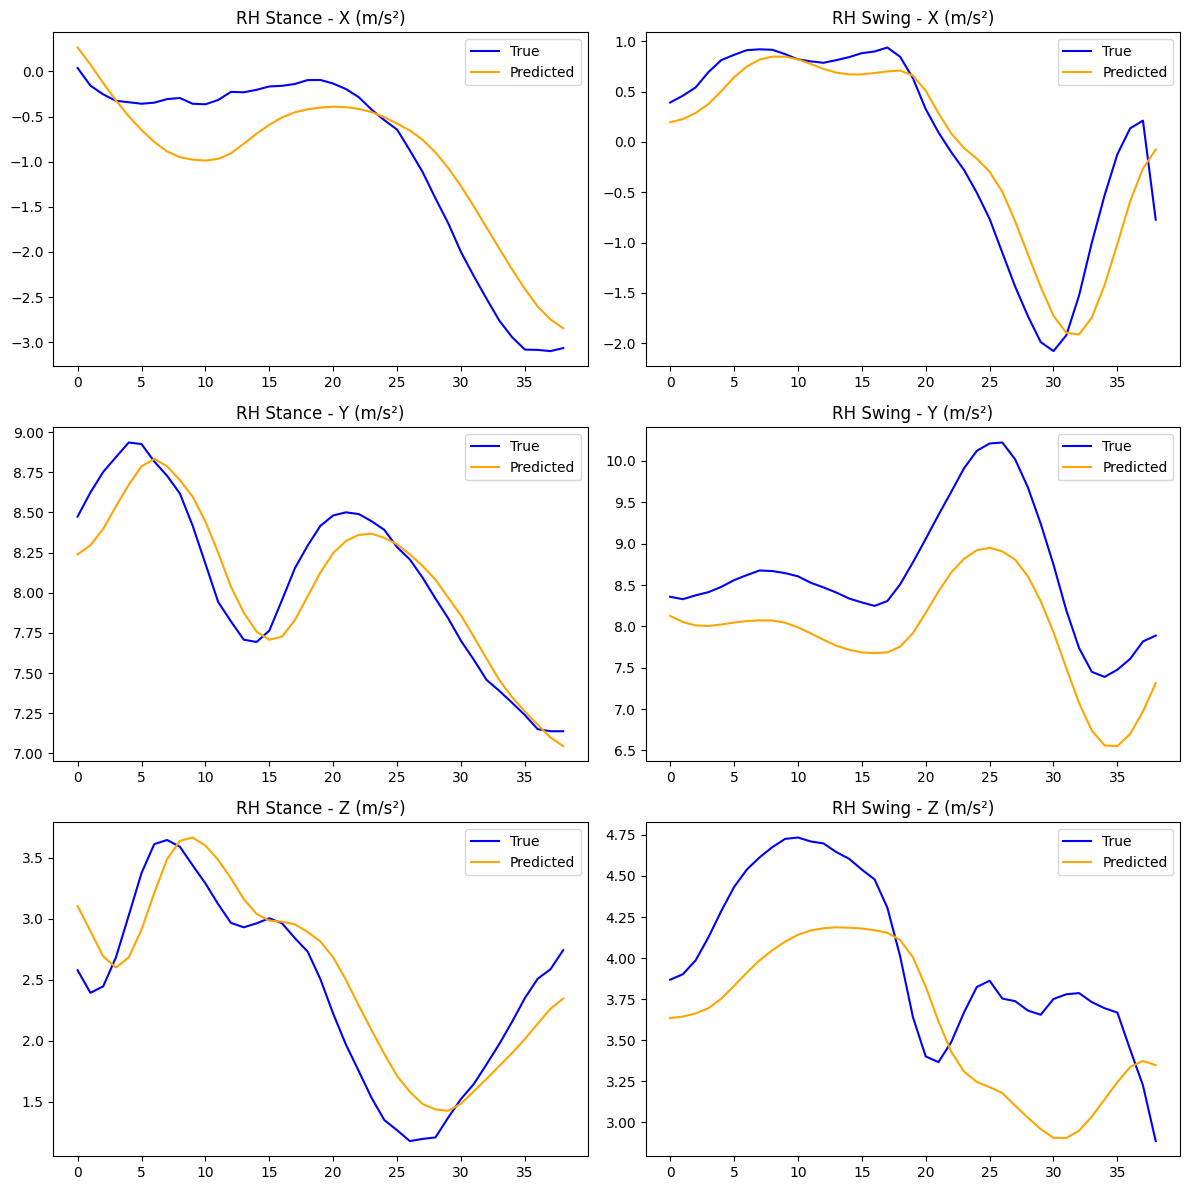

In [20]:
y_test_inverse_stance_RH = scaler_stance_RH.inverse_transform(y_test_ST_RH)
y_test_inverse_swing_RH = scaler_swing_RH.inverse_transform(y_test_SW_RH)

predictions_inverse_stance_RH = evaluate_model(models['ST_RH'], X_test_ST_RH, y_test_ST_RH, scaler_stance_RH, 'GRU for ST_RH')
predictions_inverse_swing_RH = evaluate_model(models['SW_RH'], X_test_SW_RH, y_test_SW_RH, scaler_swing_RH, 'GRU for SW_RH')

plot_joint_predictions('RH', y_test_inverse_stance_RH, predictions_inverse_stance_RH, y_test_inverse_swing_RH, predictions_inverse_swing_RH)
